Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # visualization
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler      # scaling dataset
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix ,classification_report, matthews_corrcoef
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [3]:
df.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.duplicated().sum()   # check for similar rows

1081

In [8]:
df.isnull().sum()   # look for null values

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.describe().T     # features statistics

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [11]:
# target column values count

print(df['Class'].value_counts())


Class
0    283253
1       473
Name: count, dtype: int64


In [12]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


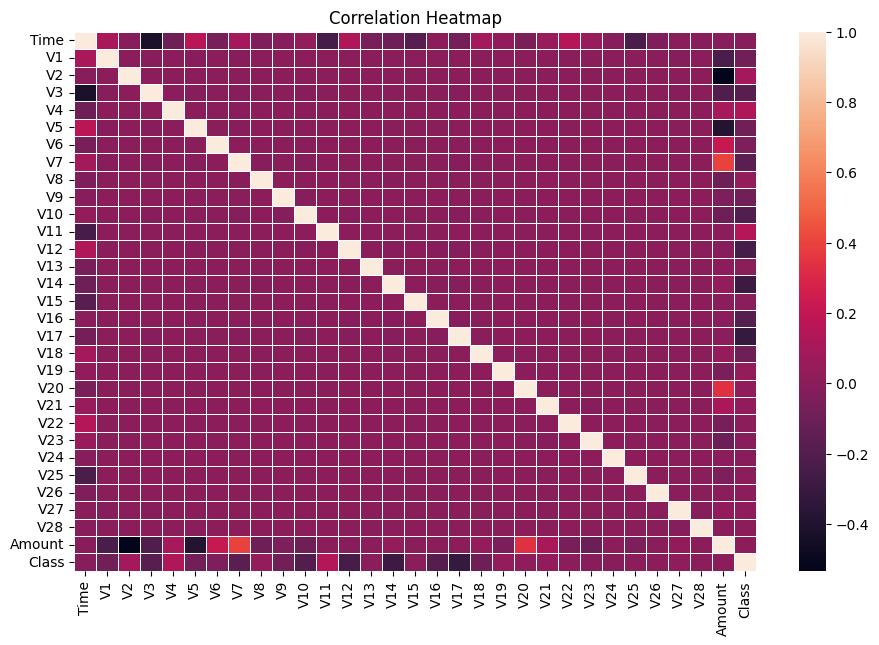

In [13]:
# data correlation
plt.figure(figsize=(11, 7))
sns.heatmap(df.corr(), annot=False, linewidths=0.5, cmap='rocket')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
X = df.drop('Class', axis=1)     # droping the target column
y = df['Class']                  # & put the target column in a variable y


In [15]:
## feature scaling using Standard Scaler/MinMaxScaler/Robust

# s_saler = StandardScaler()
# s_saler.fit(X)
# scaled_x = s_saler.transform(X)


s_saler = RobustScaler()
scaled_x = s_saler.fit_transform(X)


In [16]:
# split the dataset into training (80%) and testing (20%) set
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=0)

Model training & Evaluation

In [17]:
# support Vector Machine
from sklearn.svm import SVC

# create an SVM classifier
svm_clf = SVC(probability=True, random_state=0)
# train the SVM classifier
svm_model = svm_clf.fit(X_train, y_train)

# make predictions on the test set
svm_pred = svm_model.predict(X_test)

# calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred) * 100
svm_accuracy = "{:.2f}".format(svm_accuracy)
print("Accuracy of SVM:", svm_accuracy)

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, svm_pred)
tn, fp, fn, tp = conf_matrix_svm.ravel()

# calculate sensitivity (recall), specificity, and MCC
sensitivity_svm = tp / (tp + fn)  # Sensitivity or Recall
specificity_svm = tn / (tn + fp)  # Specificity
mcc_svm = matthews_corrcoef(y_test, svm_pred)  # Matthews Correlation Coefficient

# Print Sensitivity, Specificity, and MCC
print(f"Sensitivity (Recall): {sensitivity_svm:.2f}")
print(f"Specificity: {specificity_svm:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_svm:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, svm_pred))


Accuracy of SVM: 99.94
Sensitivity (Recall): 0.67
Specificity: 1.00
Matthews Correlation Coefficient (MCC): 0.79
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.94      0.67      0.78        87

    accuracy                           1.00     56746
   macro avg       0.97      0.83      0.89     56746
weighted avg       1.00      1.00      1.00     56746



In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rf_m = rfc.fit(X_train, y_train)
rf_pred = rf_m.predict(X_test)
rf_as = accuracy_score(y_test, rf_pred) * 100
rf_as = "{:.2f}".format(rf_as)
print("Accuracy of RF:", rf_as)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
tn, fp, fn, tp = conf_matrix_rf.ravel()

# Calculate Sensitivity (Recall), Specificity, and MCC
sensitivity_rf = tp / (tp + fn)  # Sensitivity or Recall
specificity_rf = tn / (tn + fp)  # Specificity
mcc_rf = matthews_corrcoef(y_test, rf_pred)  # Matthews Correlation Coefficient

# Print Sensitivity, Specificity, and MCC
print(f"Sensitivity (Recall): {sensitivity_rf:.2f}")
print(f"Specificity: {specificity_rf:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_rf:.2f}")


print("Classification Report:")
print(classification_report(y_test, rf_pred))

Accuracy of RF: 99.96
Sensitivity (Recall): 0.77
Specificity: 1.00
Matthews Correlation Coefficient (MCC): 0.85
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.94      0.77      0.85        87

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lgc = LogisticRegression()
lg_m = lgc.fit(X_train, y_train)
lg_pred = lg_m.predict(X_test)
lgc_as = accuracy_score(y_test, lg_pred) * 100
lgc_as = "{:.2f}".format(lgc_as)
print('Accuracy of LG:', lgc_as)

# Confusion Matrix
conf_matrix_lg = confusion_matrix(y_test, lg_pred)
tn, fp, fn, tp = conf_matrix_lg.ravel()

# Calculate Sensitivity (Recall), Specificity, and MCC
sensitivity_lg = tp / (tp + fn)  # Sensitivity or Recall
specificity_lg = tn / (tn + fp)  # Specificity
mcc_lg = matthews_corrcoef(y_test, lg_pred)  # Matthews Correlation Coefficient

# Print Sensitivity, Specificity, and MCC
print(f"Sensitivity (Recall): {sensitivity_lg:.2f}")
print(f"Specificity: {specificity_lg:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_lg:.2f}")

print("Classification Report:")
print(classification_report(y_test, lg_pred))

Accuracy of LG: 99.91
Sensitivity (Recall): 0.53
Specificity: 1.00
Matthews Correlation Coefficient (MCC): 0.66
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.84      0.53      0.65        87

    accuracy                           1.00     56746
   macro avg       0.92      0.76      0.82     56746
weighted avg       1.00      1.00      1.00     56746



In [20]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_m = nb.fit(X_train, y_train)
nb_pred = nb_m.predict(X_test)
nb_as = accuracy_score(y_test, nb_pred) * 100
nb_as = "{:.2f}".format(nb_as)
print('Accuracy of NB:', nb_as)

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, nb_pred)
tn, fp, fn, tp = conf_matrix_nb.ravel()

# Calculate Sensitivity (Recall), Specificity, and MCC
sensitivity_nb = tp / (tp + fn)  # Sensitivity or Recall
specificity_nb = tn / (tn + fp)  # Specificity
mcc_nb = matthews_corrcoef(y_test, nb_pred)  # Matthews Correlation Coefficient

# Print Sensitivity, Specificity, and MCC
print(f"Sensitivity (Recall): {sensitivity_nb:.2f}")
print(f"Specificity: {specificity_nb:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_nb:.2f}")

print("Classification Report:")
print(classification_report(y_test, nb_pred))

Accuracy of NB: 97.76
Sensitivity (Recall): 0.82
Specificity: 0.98
Matthews Correlation Coefficient (MCC): 0.21
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56659
           1       0.05      0.82      0.10        87

    accuracy                           0.98     56746
   macro avg       0.53      0.90      0.54     56746
weighted avg       1.00      0.98      0.99     56746



In [21]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn_m = knn.fit(X_train, y_train)
knn_pred = knn_m.predict(X_test)
kn_as = accuracy_score(y_test, knn_pred) * 100
kn_as = "{:.2f}".format(kn_as)
print('Accuracy of KNN:', kn_as)

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, knn_pred)
tn, fp, fn, tp = conf_matrix_knn.ravel()

# Calculate Sensitivity (Recall), Specificity, and MCC
sensitivity_knn = tp / (tp + fn)  # Sensitivity or Recall
specificity_knn = tn / (tn + fp)  # Specificity
mcc_knn = matthews_corrcoef(y_test, knn_pred)  # Matthews Correlation Coefficient

# Print Sensitivity, Specificity, and MCC
print(f"Sensitivity (Recall): {sensitivity_knn:.2f}")
print(f"Specificity: {specificity_knn:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_knn:.2f}")

print("Classification Report:")
print(classification_report(y_test, knn_pred))

Accuracy of KNN: 99.95
Sensitivity (Recall): 0.71
Specificity: 1.00
Matthews Correlation Coefficient (MCC): 0.81
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.91      0.71      0.80        87

    accuracy                           1.00     56746
   macro avg       0.96      0.86      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [22]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt_m = dtc.fit(X_train, y_train)
dt_pred = dt_m.predict(X_test)
dt_as = accuracy_score(y_test, dt_pred) * 100
dt_as = "{:.2f}".format(dt_as)
print("Accuracy of DT:", dt_as)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, dt_pred)
tn, fp, fn, tp = conf_matrix_dt.ravel()

# Calculate Sensitivity (Recall), Specificity, and MCC
sensitivity_dt = tp / (tp + fn)  # Sensitivity or Recall
specificity_dt = tn / (tn + fp)  # Specificity
mcc_dt = matthews_corrcoef(y_test, dt_pred)  # Matthews Correlation Coefficient

# Print Sensitivity, Specificity, and MCC
print(f"Sensitivity (Recall): {sensitivity_dt:.2f}")
print(f"Specificity: {specificity_dt:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_dt:.2f}")

print("Classification Report:")
print(classification_report(y_test, dt_pred))

Accuracy of DT: 99.94
Sensitivity (Recall): 0.70
Specificity: 1.00
Matthews Correlation Coefficient (MCC): 0.79
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.90      0.70      0.79        87

    accuracy                           1.00     56746
   macro avg       0.95      0.85      0.89     56746
weighted avg       1.00      1.00      1.00     56746



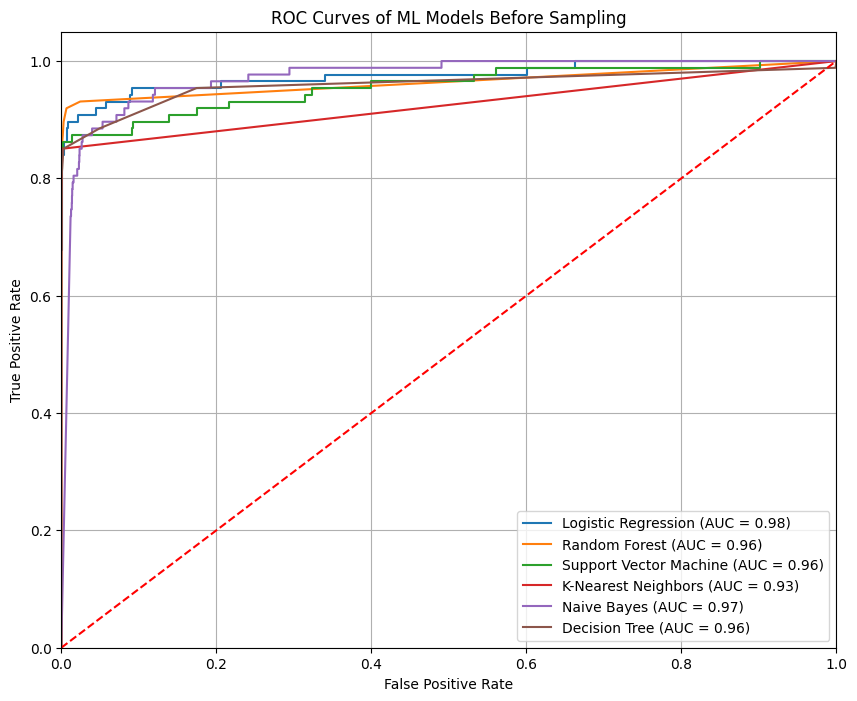

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# trained models and their predictions
models = {
    'Logistic Regression': (lg_m, X_test),
    'Random Forest': (rf_m, X_test),
    'Support Vector Machine': (svm_clf, X_test),
    'K-Nearest Neighbors': (knn, X_test),
    'Naive Bayes': (nb_m, X_test),
    'Decision Tree': (dtc, X_test)
}

# plot
plt.figure(figsize=(10, 8))

for model_name, (model, test_data) in models.items():
    # get probabilities for the positive class
    if model_name in ['Logistic Regression', 'Random Forest', 'Naive Bayes']:
        probs = model.predict_proba(test_data)[:, 1]  # for LR, RF, NB
    elif model_name == 'Support Vector Machine':
        probs = model.decision_function(test_data)  # use decision function for SVM
    else:  # for KNN and DT
        probs = model.predict_proba(test_data)[:, 1]  # use probabilities for KNN and DT

    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of ML Models Before Sampling')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('ROC_AUC_Before_Sampling.png', dpi=300, bbox_inches='tight')
plt.show()


Though the models are achieved good enough accuracy and AUC scores but they struggled to classify fraud cases effectively. The low sensitivity and MCC scores indicate there is still room for improvement.

Confusion matrix of SVM


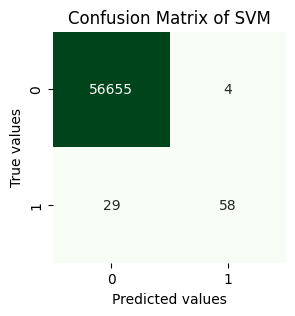

In [24]:
print('Confusion matrix of SVM')

cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of SVM")
plt.show()

Confusion matrix of RF


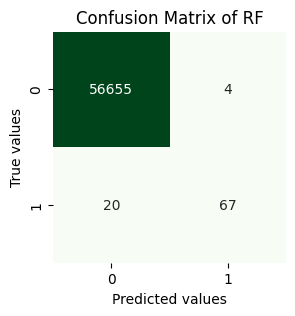

In [25]:
print('Confusion matrix of RF')

cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of RF")
plt.show()

Confusion matrix of LR


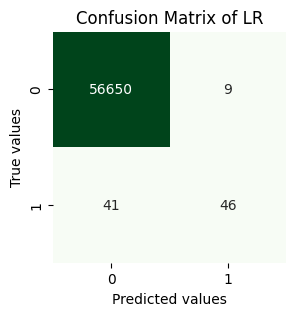

In [26]:
print('Confusion matrix of LR')

cm = confusion_matrix(y_test, lg_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of LR")
plt.show()

Confusion matrix of NB


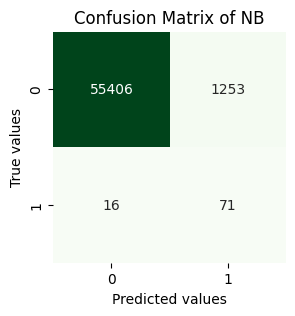

In [27]:
print('Confusion matrix of NB')

cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of NB")
plt.show()

Confusion matrix of KNN


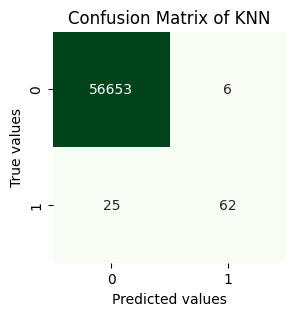

In [28]:
print('Confusion matrix of KNN')

cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of KNN")
plt.show()

Confusion matrix of DT


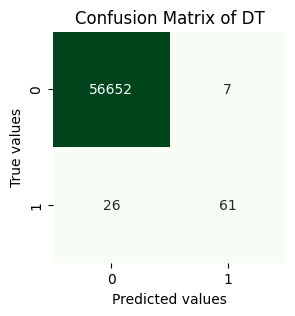

In [29]:
print('Confusion matrix of DT')

cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of DT")
plt.show()

In [30]:
# feature importance

from sklearn.inspection import permutation_importance

feature_names = df.columns[:-1]

X_test_df = pd.DataFrame(X_test, columns=feature_names)

result = permutation_importance(rfc, X_test_df, y_test, n_repeats=10, random_state=0)

perm_importance_df = pd.DataFrame({
    'Feature': X_test_df.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# print(perm_importance_df)

# Display the top 15 features
top_15_features = perm_importance_df.head(15)
print(top_15_features)

   Feature  Importance
14     V14    0.000293
12     V12    0.000189
17     V17    0.000173
10     V10    0.000160
4       V4    0.000095
26     V26    0.000037
16     V16    0.000035
3       V3    0.000025
7       V7    0.000021
24     V24    0.000019
27     V27    0.000019
28     V28    0.000014
29  Amount    0.000002
9       V9    0.000002
2       V2    0.000002


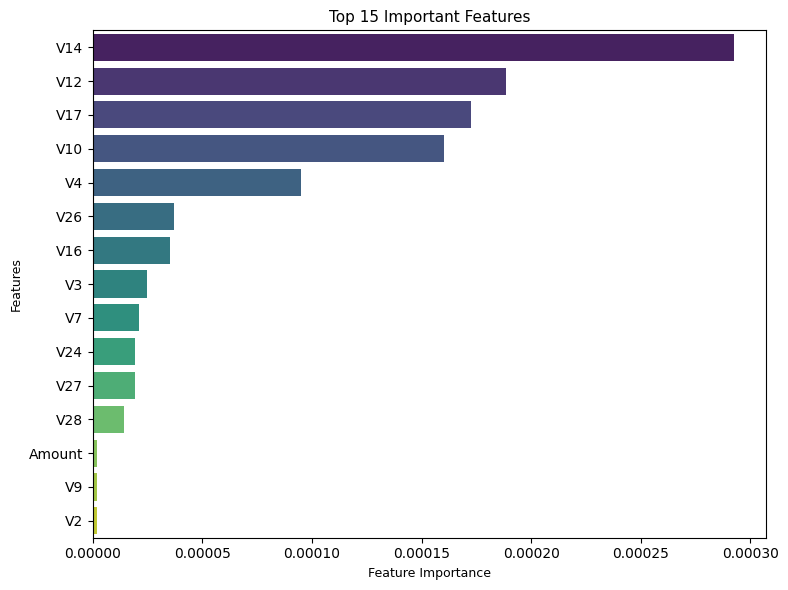

In [31]:
# Visualize the top 15 features for RF model
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=top_15_features, palette='viridis')

# plot
plt.title('Top 15 Important Features', fontsize=11)
plt.xlabel('Feature Importance', fontsize=9)
plt.ylabel('Features', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


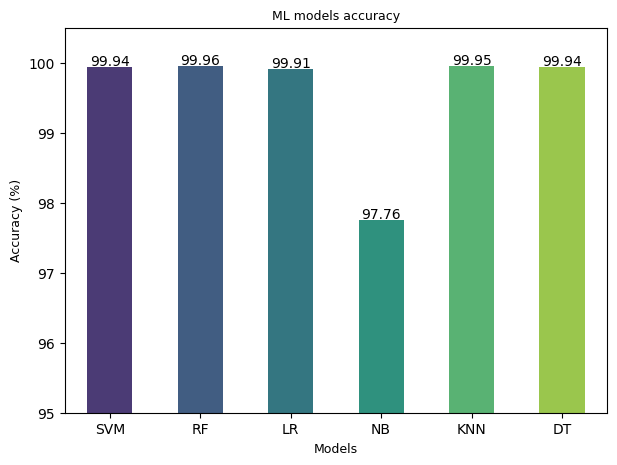

In [32]:
# model performance visualization
data = {
    'Model': ['SVM', 'RF', 'LR', 'NB', 'KNN', 'DT'],
    'Accuracy (%)': [99.94, 99.96, 99.91, 97.76, 99.95, 99.94]
}
df = pd.DataFrame(data)

# bar chart
plt.figure(figsize=(7, 5))
sns.barplot(x='Model', y='Accuracy (%)', data=df, palette='viridis', width=0.5)  # Adjust width here

# titles and labels
plt.title('ML models accuracy', fontsize=9)
plt.xlabel('Models', fontsize=9)
plt.ylabel('Accuracy (%)', fontsize=9)

# Increase the y-axis range
plt.ylim(95, 100.5)  # Adjust the upper limit to increase the range

# Show accuracy values on top of the bars
for i in range(len(df)):
    plt.text(i, df['Accuracy (%)'][i] + 0.02, f"{df['Accuracy (%)'][i]:.2f}", ha='center', fontsize=10)

plt.show()
